In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [18]:
# Load dataset
file_path = "./Dataset/AAPL_DATA.csv"  # Update with your file path if needed
data = pd.read_csv(file_path)

In [19]:

# Display first few rows
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
         Date    Open    High     Low   Close     Volume
0  2024-06-14  213.85  215.17  211.30  212.49   70122748
1  2024-06-17  213.37  218.95  212.72  216.67   93728300
2  2024-06-18  217.59  218.63  213.00  214.29   79943254
3  2024-06-20  213.93  214.24  208.85  209.68   86172451
4  2024-06-21  210.39  211.89  207.11  207.49  246421353


In [20]:
# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())
# Fill or drop missing values if needed
data = data.dropna()


Checking for missing values:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [21]:
# Convert 'Date' column to datetime and encode it
data['Date'] = pd.to_datetime(data['Date'])
data['Date_Encoded'] = data['Date'].map(lambda x: x.toordinal())  # Encode Date to numeric

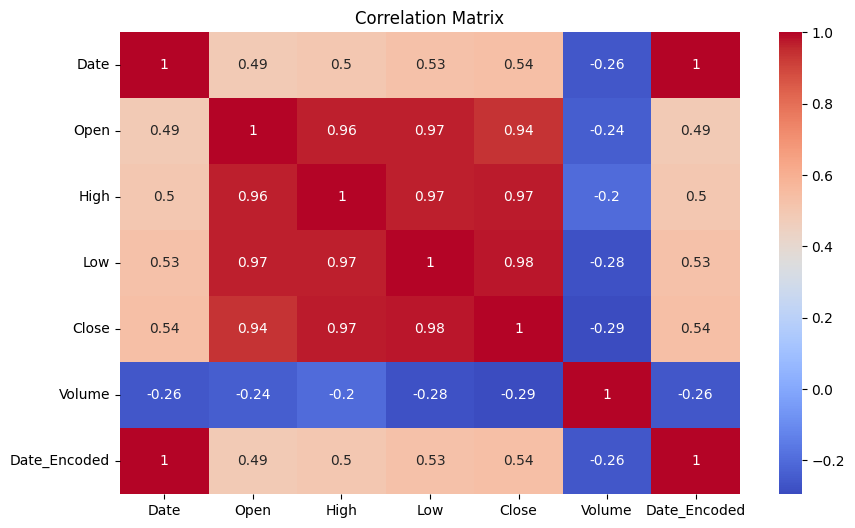

In [22]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [23]:
# Features and target variable
X = data[['Date_Encoded', 'Open', 'High', 'Low', 'Volume']]
y = data['Close']

In [24]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train the Decision Tree Regression Model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [26]:
# Make predictions
y_pred = model.predict(X_test)

In [27]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Model Evaluation:
Mean Squared Error: 1.8899272727272702
R2 Score: 0.9567136539903514


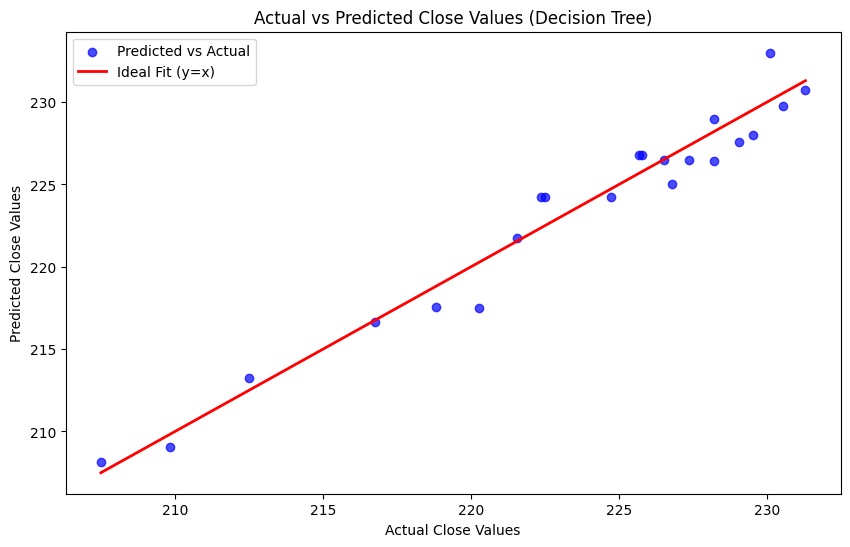

In [28]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="Ideal Fit (y=x)")
plt.xlabel("Actual Close Values")
plt.ylabel("Predicted Close Values")
plt.title("Actual vs Predicted Close Values (Decision Tree)")
plt.legend()
plt.show()

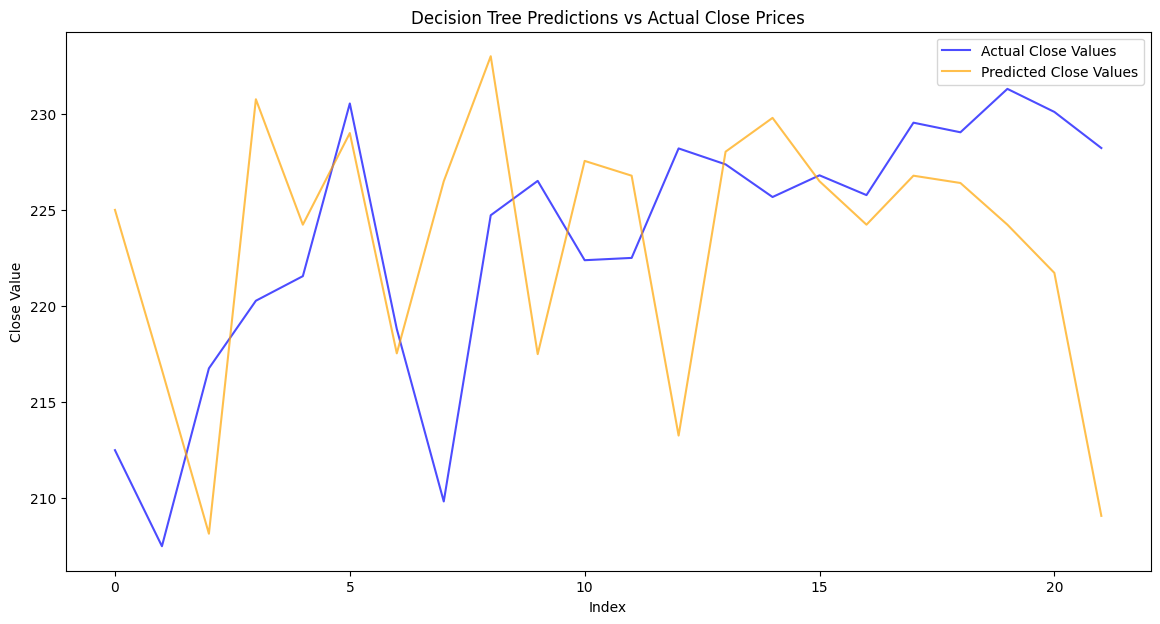

In [29]:
# Visualize Decision Tree Predictions vs True Close Prices
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test.sort_index(), label="Actual Close Values", color='blue', alpha=0.7)
plt.plot(range(len(y_pred)), pd.Series(y_pred).sort_index(), label="Predicted Close Values", color='orange', alpha=0.7)
plt.title("Decision Tree Predictions vs Actual Close Prices")
plt.xlabel("Index")
plt.ylabel("Close Value")
plt.legend()
plt.show()

In [30]:
import json

# Read data from the JSON file
with open('data_pass.json', 'r') as file:
    data = json.load(file)

print(data)

{'open': '220', 'high': '229.7400', 'low': '225.1700', 'volume': '44686020'}


In [31]:
import numpy as np
import json
# Example input for prediction (replace with your desired values)
example_input = np.array([[2024-8-21,data['open'],data['high'],data['low'],data['volume']]])  # Replace these values as needed

# Predicting the close value
predicted_close = model.predict(example_input)
print(f"Predicted Close Value: {predicted_close[0]}")

# New data to append (including "close" value)
new_entry = {
    "open": data["open"],
    "high": data["high"],
    "low": data["low"],
    "volume": data["volume"],
    "close": predicted_close[0]  # Added close value
}

file_path = "data_pass.json"

try:
    # Step 1: Read existing data
    with open(file_path, "r") as json_file:
        data = json.load(json_file)
    
    # Step 2: Append the new data
    if isinstance(data, list):  # Ensure the file contains a list
        data.append(new_entry)
    else:
        print("Error: JSON file does not contain a list.")
        data = [new_entry]  # Fallback: Create a new list
    
except FileNotFoundError:
    # If the file doesn't exist, create a new list
    print(f"{file_path} not found. Creating a new file.")
    data = [new_entry]

# Step 3: Write updated data back to the file
with open(file_path, "w") as json_file:
    json.dump(data, json_file, indent=4)

print(f"New data (including 'close' value) appended to {file_path}")


Predicted Close Value: 226.4
Error: JSON file does not contain a list.
New data (including 'close' value) appended to data_pass.json


c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [32]:
# Define the value you want to pass
value_to_pass = predicted_close[0]

# Open the .txt file in write mode
with open("from_ipynb_to_js.txt", "w") as file:
    file.write(str(value_to_pass))  # Write the value as a string

print("Value written to data.txt")


Value written to data.txt
